# Importing Pandas, Numpy, OS functions and matplotlib 

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

C:\Users\Ayman\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


# Making the dataframe

In [26]:
df = pd.read_csv(os.path.join('data','merged.csv'))
df.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn,material
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,Ba0.2La1.8Cu1O4
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,Ba0.1La1.9Ag0.1Cu0.9O4
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,Ba0.1La1.9Cu1O4
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,Ba0.15La1.85Cu1O4
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,Ba0.3La1.7Cu1O4


# Making a copy of the dataframe 

In [27]:
df_1 = df.copy()
df_1.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn,material
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,Ba0.2La1.8Cu1O4
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,Ba0.1La1.9Ag0.1Cu0.9O4
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,Ba0.1La1.9Cu1O4
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,Ba0.15La1.85Cu1O4
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,Ba0.3La1.7Cu1O4


# Making the features and the target, X and y respectively

In [14]:
X = df_1.drop(['critical_temp', 'material'], axis=1)
y = df_1['critical_temp'].values.reshape(-1,1)

# Splitting the data to test and train

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the data and testing it out

In [22]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

regressor = XGBRegressor()

regressor.fit(X_train, y_train)

y_train_pred = regressor.predict(X_train)
score_train = r2_score(y_train, y_train)

y_test_pred = regressor.predict(X_test)
score_test = r2_score(y_test, y_test_pred)
print(f'''
Train Score: {100*score_train}%
The Train score has overfitted

Test Score: {100*round(score_test,4)}%
''')


Train Score: 100.0%
The Train score has overfitted


Test Score: 92.54%



# Creating graphs to further understand the data

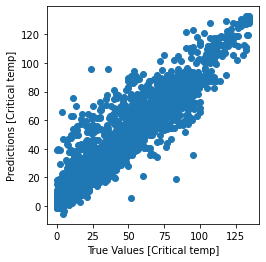

In [24]:
# y_pred = model.predict(X_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test, y_test_pred)
plt.xlabel('True Values [Critical temp]')
plt.ylabel('Predictions [Critical temp]')
# lims = [0, 50]
# plt.xlim(lims)
# plt.ylim(lims)
_ = plt.plot()


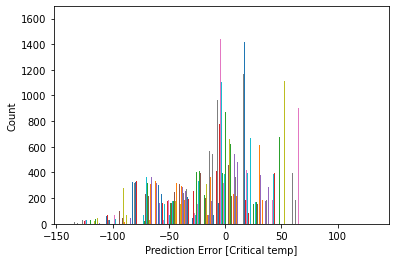

In [25]:
error = y_test_pred - y_test
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [Critical temp]")
_ = plt.ylabel("Count")

# Testing exporting and loading the model

In [28]:
regressor.save_model('model.txt')

In [33]:
regressor.load_model('model.txt')

In [34]:
y_test_pred = regressor.predict(X_test)
score_test = r2_score(y_test, y_test_pred)

In [37]:
f'Score Test: {100*round(score_test,4)} %'

'Score Test: 92.54 %'